(mid_2020)=
# A301 midterm -- solutions

-   (12) A satellite orbiting at an altitude of 36000 km observes the
    surface in the $CO_2$ absorption band with a wavelength
    range of 14 μm  $< λ < 16$ μm.

    -   The atmosphere is 20 km thick, and has a density scale height of
        *H*<sub>*ρ*</sub> = 11 km and a surface air density of
        *ρ*<sub>*a**i**r*</sub> = 1.2 . The CO<sub>2</sub> mass
        absorption coefficient is
        k<sub>λ</sub> = 0.15 m<sup>2</sup>/kg at
        λ = 15 μm and its mixing ratio is 4 × 10<sup> − 4</sup>
        kg/kg. Find the

        -   the atmosphere’s vertical optical thickness
            τ<sub>λ</sub> in the CO<sub>2</sub> band

        -   the atmosphere’s transmittance *t* in the CO<sub>2</sub>
            band

        directly beneath the satellite.

    -   If the surface is a blackbody with a temperature of 290 K, and
        the atmosphere has an constant temperature of 270 K, find the

        -   monochromatic radiance observed by the satellite in at 15
            μm

        -   the brightness temperature of the pixel in Kelvin for that
            radiance

    -   Given a pixel size 4 km<sup>2</sup>, find:

        -   the field of view in steradians, of the pixel

        -   the flux, in W/m<sup> − 2</sup> at the satellite between
            $14-16 \mu m$



-   (5) Integrate the Schwartzchild equation
    for constant temperature


-   (3) A cone has a spreading angle of 23 degrees between its center
    and its side. What is its subtended solid angle?

## Draw a nice planck function

In [1]:
import a301_lib
#from sat_lib import radiation
import sys
from sat_lib.radiation import calc_radiance, planck_invert
import matplotlib.pyplot as plt
import numpy as np
import math as m

******************************
context imported. Front of path:
/home/phil/work

in sat_lib init


check to see if the integrated flux is correct
stefan boltzman flux: 401.05
integrated flux: 401.05


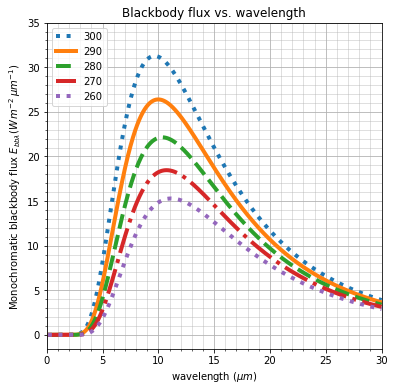

In [2]:
from sat_lib.radiation import sigma

microns=np.linspace(0.1,700,500000)
meters=microns*1.e-6

temp=280.
planck_len=calc_radiance(meters,temp)

fig, ax = plt.subplots(1,1,figsize=(6,6))
symbol = [':','-','--','-.',':']
templist = [300, 290, 280, 270, 260]
linelist=[]
for temp, symb in zip(templist,symbol):
    planck_curve = calc_radiance(meters,temp) 
    l0=ax.plot(microns,np.pi*planck_curve*1.e-6,symb,lw=4,label=temp)
    linelist.append(l0)
ax.set_xlabel(r'wavelength ($\mu m$)')
ax.set_ylabel(r'Monochromatic blackbody flux $E_{bb\lambda}$'
              r'($W\,m^{-2}\,\mu m^{-1}$)')
ax.set_title("Blackbody flux vs. wavelength")

#
# make a grid
#
major_ticks = np.arange(0, 36, 5)
minor_ticks = np.arange(0, 36, 1)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
#
# make the grid lines partially transparent with alpha
#
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=1)
ax.set_xlim(0,30)

#
# make the legend
#
handles, labels = ax.get_legend_handles_labels()
legax=ax.legend(handles,labels,loc='upper left')
#
# save the figure
#
ax.figure.savefig('a301_planck.pdf')
ax.figure.savefig('a301_planck.png')
#
# check the integrated flux
#
temp=290
print(f"check to see if the integrated flux is correct")
print(f"stefan boltzman flux: {sigma*temp**4:5.2f}")
planck_curve = calc_radiance(meters,temp) 
integ=np.sum(np.diff(meters)*planck_curve[:-1])*np.pi
print(f"integrated flux: {integ:5.2f}")
meters=microns*1.e-6
planck_len=calc_radiance(meters,temp)

## Problem 1

### Problem 1a

-   The atmosphere is 20 km thick, and has a density scale height of
    *H*<sub>*ρ*</sub> = 11 km and a surface air density of
    *ρ*<sub>*a**i**r*</sub> = 1.2 kg/m3. The CO<sub>2</sub> mass
    absorption coefficient is
    k<sub>λ</sub> = 0.15 m<sup>2</sup>/kg at
    λ = 15 μm and its mixing ratio is 4 × 10<sup> − 4</sup>
    kg/kg. Find the

    -   the atmosphere’s vertical optical thickness
        τ<sub>λ</sub> in the CO<sub>2</sub> band

    -   the atmosphere’s transmittance *t* in the CO<sub>2</sub>
        band

    directly beneath the satellite.

In [3]:
Hrho=11000.
ztop = 20.e3
k=0.15
rho_air = 1.2
rmix=4.e-4
tau=k*rmix*rho_air*Hrho*(1 - np.exp(-(ztop/Hrho)))
print(f"tau: {tau:5.2f}")
Tr=np.exp(-tau)
print(f"Tr: {Tr:5.2f}")

tau:  0.66
Tr:  0.52


### Problem 1b

-   If the surface is a blackbody with a temperature of 290 K, and
    the atmosphere has an constant temperature of 270 K, find the

    -   monochromatic radiance observed by the satellite in at 15
        μm

    -   the brightness temperature of the pixel in Kelvin for that
        radiance

In [4]:
Bsfc=calc_radiance(15.e-6,290.)*1.e-6  #convert to W/m^2/micron
Batm=calc_radiance(15.e-6,270.)*1.e-6
print(f'Bsfc={Bsfc:5.2f} W/m^2/micron/sr, Batm={Batm:5.2f} W/m^2/micron/sr')
TOA=Bsfc*Tr + (1 - Tr)*Batm
print(f'TOA monochromatic radiance = {TOA:5.2f} W/M^2/micron/sr')
print(f'corresponding monochromatic flux for blackbody = {TOA*m.pi:5.2f} W/M^2/micron')
Tb=planck_invert(15.e-6,TOA*1.e6)
print(f"Brightness temperature {Tb:5.2f}")

Bsfc= 5.96 W/m^2/micron/sr, Batm= 4.63 W/m^2/micron/sr
TOA monochromatic radiance =  5.31 W/M^2/micron/sr
corresponding monochromatic flux for blackbody = 16.69 W/M^2/micron
Brightness temperature 280.60


### Problem 1c

 -   Given a pixel size 4 km<sup>2</sup>, find:

    -   the field of view in steradians, of the pixel

    -   the flux, in *W*/*m*<sup> − 2</sup> at the satellite between
        $14-16 \mu m$

In [5]:
delta_omega = delta_omega=4/36000.**2.
print(f'delta_omega: {delta_omega:8.3g} sr')

delta_omega: 3.09e-09 sr


In [6]:
channel_width = 2
TOA_flux = TOA*delta_omega*channel_width
print(f'TOA flux from 14-16 microns: {TOA_flux:8.3g} W/m^2/micron')

TOA flux from 14-16 microns: 3.28e-08 W/m^2/micron


## Problem 2

-  (5) Integrate the Schwartzchild equation
   for constant temperature
   
see [Section 4.4.3](https://a301_web.eoas.ubc.ca/week4/schwartz.html?highlight=schwart#adding-emission-to-beer-s-law)

## Problem 3

- (3) A cone has a spreading angle of 23 degrees between its center
    and its side. What is its subtended solid angle?
  
Use [Problem 7.2.2](https://a301_web.eoas.ubc.ca/week6/answers/sols_mid_revI.html#solid-angle-and-radiance)

$$
\begin{align}
\omega &= \int_0^{2\pi} \int_0^{23} \sin \theta d\theta d\phi \\
       &= -2\pi (\cos(23) - \cos(0)) \\
       &= 2\pi (1 - \cos(23)) = 2\pi(1 - 0.92) = 0.5\ sr \\
\end{align}
$$

In [7]:
cos23 = np.cos(23*np.pi/180.)
print(f'cos23: {cos23:5.2f}')
print(f'omega: {2*np.pi*(1. - cos23):5.2f}')

cos23:  0.92
omega:  0.50
